# **Cognition and Computation Final Project**
Asma Hoseinpour Siouki



# A Comparative Study of Visual Concept Learning using Deep Belief Networks and Convolutional Neural Networks in PyTorch

In this project, we delve into the realm of image classification, specifically focusing on visual concept learning, using two prominent deep learning techniques: Deep Belief Networks (DBNs) and Convolutional Neural Networks (CNNs). We leverage Python and its powerful library PyTorch to simulate and evaluate the performances of these models in understanding and classifying visual data. Starting with established lab practices as our foundation, we aim to explore, innovate and understand the capabilities of these methodologies, with the goal of contributing to advancements in the field of image classification.


## Importing Libraries

In [ ]:
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import scipy.cluster as cluster
import sklearn.preprocessing
import torch
import torchvision as tv
import torch.nn as nn
from tqdm.notebook import tqdm
import torch.nn.functional as functional

In [ ]:
print(torch.cuda.is_available())
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

True


## DataSet



We are using Fashion MNIST dataset. The Fashion-MNIST dataset is a dataset of Zalando's article images, intended as a drop-in replacement for the classic MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits as MNIST.

*   The dataset consists of a training set of 60,000 examples and a test set of 10,000 examples.

* Each example is a 28x28 grayscale image, associated with a label from 10
classes.

* Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning lighter. This pixel-value is an integer between 0 and 255, inclusive.

* The 10 classes in the dataset are: T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot




In [ ]:
%%capture

my_transforms= tv.transforms.Compose(
           [tv.transforms.ToTensor()]
)

Fashion_MNIST_train = tv.datasets.FashionMNIST('data/', train=True, download=True, transform=my_transforms)
Fashion_MNIST_test  = tv.datasets.FashionMNIST('data/', train=False, download=True, transform=my_transforms)

In [ ]:
Fashion_MNIST_train.data = (Fashion_MNIST_train.data.type(torch.FloatTensor)/255) #scaling each pixel to become between 0 and 1
Fashion_MNIST_test.data  = (Fashion_MNIST_test.data.type(torch.FloatTensor)/255)

In [ ]:
Class_names = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [ ]:
def plot_first_20(plot_data, plot_target):

  plt.figure(figsize=(10,2))

  for idx in range(20):
      plt.subplot(2,10,idx+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      img = plot_data.to('cpu')[idx]
      label = plot_target.to('cpu')[idx].item()
      plt.imshow(img, cmap='gray')
      plt.xlabel(Class_names[label], fontsize='x-small')

  plt.tight_layout()
  plt.show()

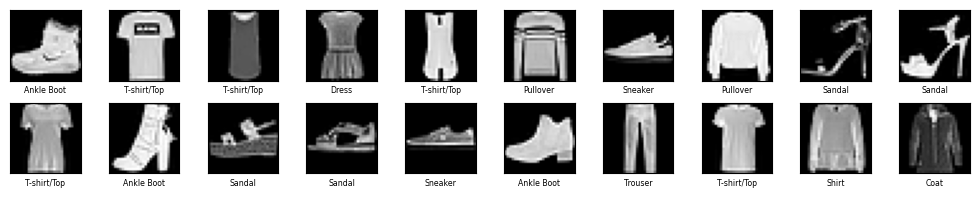

In [ ]:
plot_first_20 (Fashion_MNIST_train.data, Fashion_MNIST_train.targets)

In [ ]:
Fashion_MNIST_train.data = Fashion_MNIST_train.data.to(device)
Fashion_MNIST_test.data = Fashion_MNIST_test.data.to(device)
Fashion_MNIST_train.targets = Fashion_MNIST_train.targets.to(device)
Fashion_MNIST_test.targets = Fashion_MNIST_test.targets.to(device)

In [ ]:
Fashion_MNIST_train.data.shape

torch.Size([60000, 28, 28])

# Deep Belief Networks

Deep Belief Networks (DBNs) are generative deep learning models, composed of multiple layers of latent variables or hidden units. Each layer in a DBN is effectively a Restricted Boltzmann Machine (RBM), stacked upon each other, which allows the network to learn complex patterns from data in an unsupervised manner. For the implementation of DBNs in this project, I am utilizing a DBN implementation available on a GitHub repository that leverages the PyTorch framework.

In [ ]:
def get_dbn_library():
  files = ["DBN.py", "RBM.py"]
  repository_url = "https://raw.githubusercontent.com/flavio2018/Deep-Belief-Network-pytorch/master/"
  for file in files:
    ! wget -O {file} {repository_url}{file}

In [ ]:
%%capture
get_dbn_library()

Upon conducting numerous experiments with various hyperparameters, I arrived at an optimal configuration for the model. The chosen hyperparameters are as follows:

* **Visible Units**: The visible layer constitutes a 2828 matrix, mirroring the dimensions of the input images, which are also 2828 pixels.

* **Hidden Units**: The network includes three hidden layers, each equipped with 800 units, providing a robust depth for learning intricate patterns.

* **Gibbs Sampling Steps (k)**: The number of steps involved in the Gibbs Sampling process is set to one, balancing the trade-off between computational efficiency and the accuracy of the sampling process.

* **Learning Rate**: A constant learning rate of 0.01 has been used, which provides a steady pace for the model updates during the gradient descent optimization.



In [ ]:
from DBN import DBN

dbn_Fmnist = DBN(visible_units=28*28,
                hidden_units=[800, 800, 800],
                k=1,
                learning_rate=0.01,
                learning_rate_decay=False,
                initial_momentum=0.5,
                final_momentum=0.95,
                weight_decay=0.00001,
                xavier_init=False,
                increase_to_cd_k=False,
                use_gpu=torch.cuda.is_available())

In [ ]:
num_epochs = 70
batch_size = 125

dbn_Fmnist.train_static(
    Fashion_MNIST_train.data,
    Fashion_MNIST_train.targets,
    num_epochs,
    batch_size
)

--------------------
Training RBM layer 1
|Epoch |avg_rec_err |std_rec_err  |mean_grad |std_grad  |
|10    |2.3567     |0.0857       |90.5135   |2.1399     |
|20    |2.0089     |0.0747       |84.5871   |2.1654     |
|30    |1.8970     |0.0732       |80.1016   |1.9511     |
|40    |1.8336     |0.0710       |75.9731   |1.5480     |
|50    |1.7895     |0.0676       |72.8958   |1.6804     |
|60    |1.7566     |0.0701       |70.4868   |1.5099     |
|70    |1.7299     |0.0686       |68.2915   |1.4743     |
--------------------
Training RBM layer 2
|Epoch |avg_rec_err |std_rec_err  |mean_grad |std_grad  |
|10    |1.3416     |0.0347       |69.9963   |1.4785     |
|20    |1.0583     |0.0276       |60.4058   |1.0917     |
|30    |0.9713     |0.0245       |56.7808   |0.9319     |
|40    |0.9296     |0.0232       |54.5773   |1.0146     |
|50    |0.9042     |0.0242       |53.7322   |1.1067     |
|60    |0.8870     |0.0244       |52.6311   |0.9903     |
|70    |0.8759     |0.0232       |51.7024   |0

## Analyze the Internal Representations Developed by the *Model*

In this section, we aim to scrutinize the internal representations learned by our model. To gain a thorough understanding of these, we adopt two different strategies.

Firstly, we engage in the visualization of receptive fields. This approach enables us to directly inspect what features our model has learned to recognize, offering valuable insights into the operation of our DBN.

Subsequently, we employ hierarchical clustering as our second method of analysis.

### Visualizing Receptive Fields

Once the network is trained, we'll visualize the learned weights. We'll display them as images similar in size to our training images, revealing which image sections activate specific units.

To reduce noise in these plots, we'll set a weight threshold. Since weights may range differently, we'll employ Scikit-Learn's MinMaxScaler to ensure consistent comparisons across visualizations.

In [ ]:
def get_weights(dbn, layer):
  return dbn.rbm_layers[layer].W.cpu().numpy()

def apply_threshold(weights, threshold=0):
  return weights * (abs(weights) > threshold)

def plot_layer_receptive_fields(weights):
  num_subplots = 20
  plt.figure(figsize=(10,2))

  for i in range(num_subplots):
    plt.subplot(2,10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(weights[i,:].reshape((28,28)), cmap=plt.cm.gray)  # here we select the weights we want to plot

def apply_min_max_scaler(learned_weights):
  original_shape = learned_weights.shape
  min_max_scaler = sklearn.preprocessing.MinMaxScaler()
  min_max_scaled_learned_weights = min_max_scaler.fit_transform(learned_weights.ravel().reshape(-1,1))
  min_max_scaled_learned_weights = min_max_scaled_learned_weights.reshape(original_shape)
  return min_max_scaled_learned_weights

#### Receptive Fields of the Frist Layer

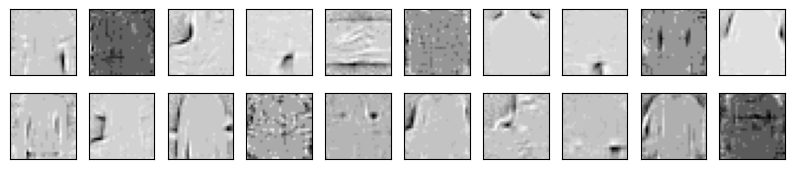

In [ ]:
learned_weights_layer_1 = get_weights(dbn_Fmnist, layer=0)
# we apply a threshold in order to make the pictures less noisy
learned_weights_layer_1 = apply_threshold(learned_weights_layer_1, 0.1)
# we scale the learned weights in order to make comparison
learned_weights_layer_1 = apply_min_max_scaler(learned_weights_layer_1)

plot_layer_receptive_fields(learned_weights_layer_1.T)

#### Receptive Fields of the Seconed Layer

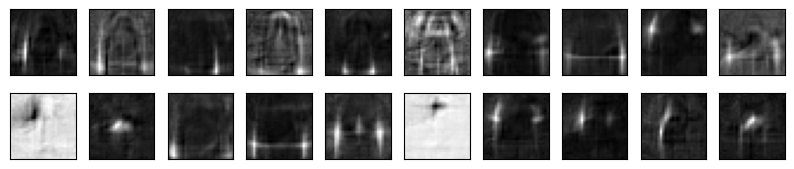

In [ ]:
learned_weights_layer_1 = get_weights(dbn_Fmnist, layer=0)
learned_weights_layer_2 = get_weights(dbn_Fmnist, layer=1)

learned_weights_layer_1 = apply_threshold(learned_weights_layer_1, 0.1)
learned_weights_layer_2 = apply_threshold(learned_weights_layer_2, 0.1)

learned_weights_product = (learned_weights_layer_1 @ learned_weights_layer_2)  # here we do the projection
learned_weights_product = apply_threshold(learned_weights_product, 0.1)
learned_weights_product = apply_min_max_scaler(learned_weights_product)

plot_layer_receptive_fields(learned_weights_product.T)

#### Receptive Fields of the Third Layer

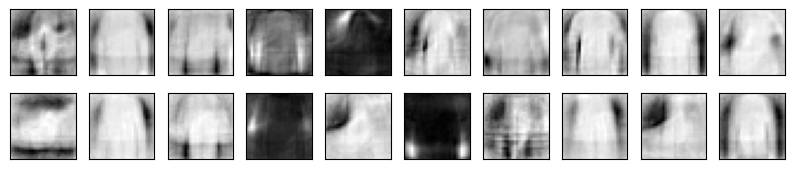

In [ ]:
learned_weights_layer_1 = get_weights(dbn_Fmnist, layer=0)
learned_weights_layer_2 = get_weights(dbn_Fmnist, layer=1)
learned_weights_layer_3 = get_weights(dbn_Fmnist, layer=2)

learned_weights_layer_1 = apply_threshold(learned_weights_layer_1, 0.1)
learned_weights_layer_2 = apply_threshold(learned_weights_layer_2, 0.1)
learned_weights_layer_3 = apply_threshold(learned_weights_layer_3, 0.1)

learned_weights_12_product = (learned_weights_layer_1 @ learned_weights_layer_2)  # here we do the projection
learned_weights_23_product = (learned_weights_12_product @ learned_weights_layer_3)  # here we do the projection
learned_weights_23_product = apply_threshold(learned_weights_23_product, 0.1)
learned_weights_23_product = apply_min_max_scaler(learned_weights_23_product)

plot_layer_receptive_fields(learned_weights_23_product.T)

### Clustering Internal Representations

Next, we want to look at the details of what our model has learned. We do this by finding the 'center' (centroid) of the information each class in our model has learned. We then use a technique called hierarchical clustering to see how similar these centers are to each other.

Our model is made up of several parts called RBMs, so we have to calculate the hidden representations for each RBM. We then find the mean of these representations for each class, and put all these means into a matrix.

Finally, we use the matrix to run the clustering technique, and show the results in a chart called a dendrogram.

In [ ]:
def get_kth_layer_repr(input, k, device):
  flattened_input = input.view((input.shape[0], -1)).type(torch.FloatTensor).to(device)
  hidden_repr, __ = dbn_Fmnist.rbm_layers[k].to_hidden(flattened_input)  # here we access the RBM object
  return hidden_repr

In [ ]:
hidden_repr_layer_1 = get_kth_layer_repr(Fashion_MNIST_train.data, 0, device)
hidden_repr_layer_2 = get_kth_layer_repr(hidden_repr_layer_1, 1, device)
hidden_repr_layer_3 = get_kth_layer_repr(hidden_repr_layer_2, 2, device)

In [ ]:
def get_mask(label):  # we use this function to filter by class
  labels = Fashion_MNIST_train.targets.cpu().numpy()
  return labels == label

def get_label_to_mean_hidd_repr(hidden_representation):
  hidden_representation_np = hidden_representation.cpu().numpy()
  return {
    label: hidden_representation_np[get_mask(label)].mean(axis=0)  # here we filter by class and compute the mean
    for label in range(10)
  }

def get_hidden_reprs_matrix(hidden_representation):  # we use this to build the matrices
  label_to_mean_hidd_repr = get_label_to_mean_hidd_repr(hidden_representation)
  return np.concatenate(
    [np.expand_dims(label_to_mean_hidd_repr[label], axis=0)  # here we adjust the shape of centroids to do the concat
    for label in range(10)])

In [ ]:
mean_hidd_repr_matrix_3 = get_hidden_reprs_matrix(hidden_repr_layer_3)

In [ ]:
def plot_dendrogram(mean_repr_matrix, title=""):
  fig, ax = plt.subplots()
  linkage = cluster.hierarchy.linkage(mean_repr_matrix, method="complete")  # we run the clustering algorithm here
  dendrogram = cluster.hierarchy.dendrogram(linkage, labels= Class_names)
  plt.xticks(rotation=90, fontsize='x-small')
  ax.set_title(title)

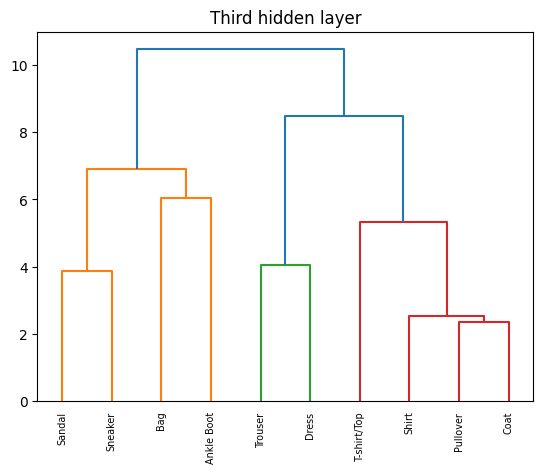

In [ ]:
plot_dendrogram(mean_hidd_repr_matrix_3, "Third hidden layer")

## Linear Read-Out

In this part, we use a linear readout to check the information learned by each layer in our Deep Belief Network (DBN). This means we use a simple linear classifier on the data coming from each layer to classify the images.

By doing this, we can measure how useful each layer's learned information is for classifying the images. After training, we calculate the accuracy of each model, which shows us how well it performed. This helps us compare the effectiveness of different layer representations in the DBN.

In [ ]:
class LinearModel(torch.nn.Module):
  def __init__(self, layer_size):
    super().__init__()
    self.linear = torch.nn.Linear(layer_size, 10)

  def forward(self, x):
    return self.linear(x)

In [ ]:
layer_size = dbn_Fmnist.rbm_layers[0].W.shape[1]
linear1 = LinearModel(layer_size).to(device)

layer_size = dbn_Fmnist.rbm_layers[1].W.shape[1]
linear2 = LinearModel(layer_size).to(device)

layer_size = dbn_Fmnist.rbm_layers[2].W.shape[1]
linear3 = LinearModel(layer_size).to(device)

In [ ]:
def train_linear(linear, hidden_reprs):
  optimizer = torch.optim.SGD(linear.parameters(), lr=0.05)
  loss_fn = torch.nn.CrossEntropyLoss()
  epochs = 1500

  for epoch in range(epochs):
    optimizer.zero_grad()
    predictions = linear(hidden_reprs).squeeze()
    targets = Fashion_MNIST_train.targets.reshape(predictions.shape[0])  # here are the labels
    loss = loss_fn(predictions, targets)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
      print("epoch : {:3d}/{}, loss = {:.4f}".format(epoch + 1, epochs, loss))

In [ ]:
train_linear(linear1, hidden_repr_layer_1)

epoch :   1/1500, loss = 2.3162
epoch : 101/1500, loss = 0.7593
epoch : 201/1500, loss = 0.6353
epoch : 301/1500, loss = 0.5796
epoch : 401/1500, loss = 0.5452
epoch : 501/1500, loss = 0.5209
epoch : 601/1500, loss = 0.5026
epoch : 701/1500, loss = 0.4881
epoch : 801/1500, loss = 0.4763
epoch : 901/1500, loss = 0.4663
epoch : 1001/1500, loss = 0.4577
epoch : 1101/1500, loss = 0.4503
epoch : 1201/1500, loss = 0.4438
epoch : 1301/1500, loss = 0.4379
epoch : 1401/1500, loss = 0.4327


In [ ]:
train_linear(linear2, hidden_repr_layer_2)

epoch :   1/1500, loss = 2.3019
epoch : 101/1500, loss = 0.7194
epoch : 201/1500, loss = 0.6152
epoch : 301/1500, loss = 0.5668
epoch : 401/1500, loss = 0.5365
epoch : 501/1500, loss = 0.5152
epoch : 601/1500, loss = 0.4991
epoch : 701/1500, loss = 0.4864
epoch : 801/1500, loss = 0.4760
epoch : 901/1500, loss = 0.4673
epoch : 1001/1500, loss = 0.4599
epoch : 1101/1500, loss = 0.4535
epoch : 1201/1500, loss = 0.4479
epoch : 1301/1500, loss = 0.4428
epoch : 1401/1500, loss = 0.4383


In [ ]:
train_linear(linear3, hidden_repr_layer_3)

epoch :   1/1500, loss = 2.2737
epoch : 101/1500, loss = 0.7153
epoch : 201/1500, loss = 0.6063
epoch : 301/1500, loss = 0.5564
epoch : 401/1500, loss = 0.5254
epoch : 501/1500, loss = 0.5036
epoch : 601/1500, loss = 0.4872
epoch : 701/1500, loss = 0.4743
epoch : 801/1500, loss = 0.4637
epoch : 901/1500, loss = 0.4550
epoch : 1001/1500, loss = 0.4475
epoch : 1101/1500, loss = 0.4410
epoch : 1201/1500, loss = 0.4353
epoch : 1301/1500, loss = 0.4303
epoch : 1401/1500, loss = 0.4258


In [ ]:
hidden_repr_layer_1_test = get_kth_layer_repr(Fashion_MNIST_test.data, 0, device)
hidden_repr_layer_2_test = get_kth_layer_repr(hidden_repr_layer_1_test, 1, device)
hidden_repr_layer_3_test = get_kth_layer_repr(hidden_repr_layer_2_test, 2, device)

In [ ]:
# here we compute the predictions
predictions_test1 = linear1(hidden_repr_layer_1_test)
predictions_test2 = linear2(hidden_repr_layer_2_test)
predictions_test3 = linear3(hidden_repr_layer_3_test)

In [ ]:
def compute_accuracy(predictions_test, targets):

  targets = targets.to('cpu')
  predictions_indices = predictions_test.to('cpu').max(axis=1).indices  # convert probabilities to indices
  accuracy = (predictions_indices == targets).sum() / len(targets)
  return accuracy.item()

In [ ]:
compute_accuracy(predictions_test1, Fashion_MNIST_test.targets)

0.8406000137329102

In [ ]:
compute_accuracy(predictions_test2, Fashion_MNIST_test.targets)

0.8371000289916992

In [ ]:
compute_accuracy(predictions_test3, Fashion_MNIST_test.targets)

0.8425999879837036

## Confusion Matrix

In this part, we create a confusion matrix for our model that uses the third layer's data. This helps us see where the model is making mistakes in its classifications. By studying these errors, we can better understand how the model is working and where it might need adjustments.

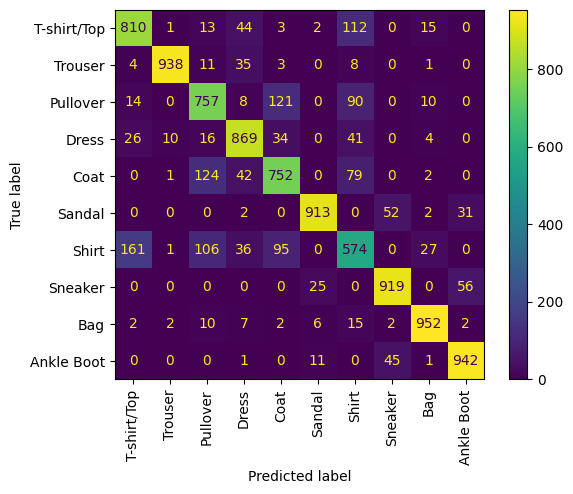

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = Fashion_MNIST_test.targets.to('cpu').numpy()
y_pred = predictions_test3.to('cpu').max(axis=1).indices.numpy()
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Class_names)
disp.plot()
plt.xticks(rotation=90)
plt.show()


The confusion matrix reveals specific areas where our model encounters difficulties in classification. Notably, the model seems to struggle with correctly classifying 'shirts'. It often confuses 'shirts' with similar items such as 'coats', 'pullovers', and 'T-shirts'. This observation aligns with the insights gleaned from the clustering dendrogram. The dendrogram, too, hinted at a difficulty in distinguishing between 'shirts' and similar items such as 'coats', 'pullovers', and 'T-shirts'. Therefore, both the confusion matrix and the dendrogram corroborate the same classification challenge, lending further credence to the identified area of improvement for our model.

# Convolutional Neural Network


Convolutional Neural Networks (CNNs) are a type of deep learning model optimized for image processing. They use layers of convolutions, non-linear activations, and often pooling to extract increasingly complex features from images. The final fully connected layers aggregate these features to make predictions. CNNs are widely used in image classification, object detection, and semantic segmentation tasks

In [ ]:
%%capture

my_transforms= tv.transforms.Compose(
           [tv.transforms.ToTensor()]
)

F_MNIST_train = tv.datasets.FashionMNIST('data/', train=True, download=True, transform=my_transforms)
F_MNIST_test  = tv.datasets.FashionMNIST('data/', train=False, download=True, transform=my_transforms)

In [ ]:
batch_size = 125 # Define the batch size
train_loader = torch.utils.data.DataLoader(F_MNIST_train, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(F_MNIST_test, batch_size=batch_size)

## Constructing a CNN Model
We will define a custom CNN model class, FashionCNN, which inherits from PyTorch's nn.Module class. This class will contain the layers and operations that comprise our neural network.

Our CNN architecture includes the following components:

1. Two convolutional blocks, each containing:

  * A Convolutional layer with a kernel size of 3x3. The first block includes zero padding (padding=1), while the second block does not (padding=0). Both layers have a stride of 1.
  * A Batch Normalization layer to stabilize and speed up learning.
  * An activation function (ReLU) to introduce non-linearity into the network.
  * A Max Pooling layer with a kernel size of 2x2 and stride of 2 to down-sample the input.
2. A layer to flatten the output from the convolutional blocks, preparing it for the fully connected layer.

3. Three fully connected layers, each with different input/output dimensions.

4. A dropout layer with a dropout probability of 0.25 to prevent overfitting.

The forward method encapsulates the forward pass of our CNN. The transformations of our input image dimensions throughout the network are as follows:

  * First Convolutional layer: input: 28x28x3, output: 28x28x32
  * First Max Pooling layer: input: 28x28x32, output: 14x14x32
  * Second Convolutional layer: input: 14x14x32, output: 12x12x64
  * Second Max Pooling layer: input: 12x12x64, output: 6x6x64
  
The final fully connected layer outputs 10 features, corresponding to the 10 clothing categories.







In [ ]:
class FashionCNN(nn.Module):
    """
    A simple CNN for FashionMNIST classification.
    """
    def __init__(self):
        super(FashionCNN, self).__init__()

        self.conv_layers = nn.Sequential(
            # Layer 1
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Layer 2
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        self.fc_layers = nn.Sequential(
            nn.Linear(in_features=64*6*6, out_features=600),
            nn.Dropout(0.25),
            nn.Linear(in_features=600, out_features=120),
            nn.Linear(in_features=120, out_features=10)
        )

    def forward(self, x):
        # Pass data through conv layers
        x = self.conv_layers(x)

        # Flatten the layer to pass it to fully connected layers
        x = x.view(x.size(0), -1)

        # Pass data through fully connected layers
        out = self.fc_layers(x)

        return out

In [ ]:
# Instantiate the model
fashion_cnn = FashionCNN()
fashion_cnn = fashion_cnn.to(device)

loss_function = nn.CrossEntropyLoss()
learning_rate = 0.001

# Choose the optimizer and pass the model's parameters to it
optimizer = torch.optim.Adam(fashion_cnn.parameters(), lr=learning_rate)

print(fashion_cnn)

FashionCNN(
  (conv_layers): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=2304, out_features=600, bias=True)
    (1): Dropout(p=0.25, inplace=False)
    (2): Linear(in_features=600, out_features=120, bias=True)
    (3): Linear(in_features=120, out_features=10, bias=True)
  )
)


### Training the Network and Testing it

In [ ]:
# Define the number of epochs and initialize counters and storage lists
num_epochs = 5
iteration_count = 0
loss_list, iteration_list, accuracy_list = [], [], []
predictions_list, labels_list = [], []


# Training loop
for epoch in range(num_epochs):
    for images, labels in train_loader:

        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = fashion_cnn(images.view(batch_size, 1, 28, 28))
        loss = loss_function(outputs, labels)

        # Zero out gradients to avoid accumulation
        optimizer.zero_grad()

        # Backward pass
        loss.backward()

        # Update parameters
        optimizer.step()

        iteration_count += 1

        # Evaluation every 50 iterations
        if iteration_count % 50 == 0:
            correct_predictions = 0
            total_predictions = 0

            # Test the model
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                labels_list.append(labels)

                outputs = fashion_cnn(images.view(batch_size, 1, 28, 28))

                _, predicted = torch.max(outputs.data, 1)
                total_predictions += labels.size(0)
                correct_predictions += (predicted == labels).sum().item()

                predictions_list.append(predicted)

            accuracy = 100 * correct_predictions / total_predictions
            loss_list.append(loss.item())
            iteration_list.append(iteration_count)
            accuracy_list.append(accuracy)

        # Print progress every 500 iterations
        if iteration_count % 500 == 0:
            print(f"Iteration: {iteration_count}, Loss: {loss.item()}, Accuracy: {accuracy}%")


Iteration: 500, Loss: 0.3664301037788391, Accuracy: 86.77%
Iteration: 1000, Loss: 0.24412280321121216, Accuracy: 89.55%
Iteration: 1500, Loss: 0.26026737689971924, Accuracy: 90.06%
Iteration: 2000, Loss: 0.20252414047718048, Accuracy: 90.54%


### Checking Accuracy and Loss Over Iterations

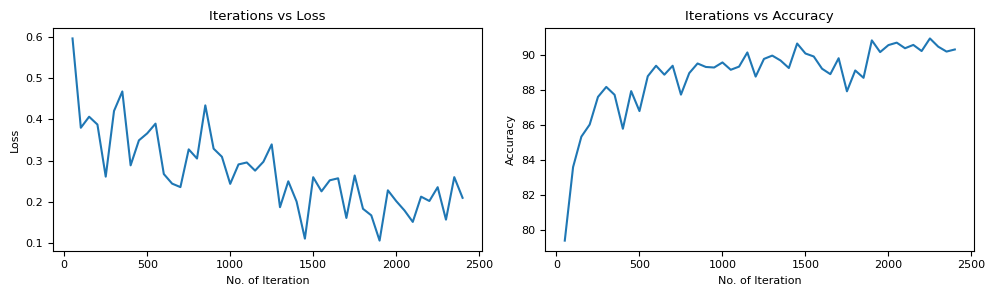

In [ ]:
plt.figure(figsize=(10, 3))
plt.rcParams['font.size'] = 8

# First subplot for Loss vs Iteration
plt.subplot(1, 2, 1)
plt.plot(iteration_list, loss_list)
plt.xlabel("No. of Iteration")
plt.ylabel("Loss")
plt.title("Iterations vs Loss")

# Second subplot for Accuracy vs Iteration
plt.subplot(1, 2, 2)
plt.plot(iteration_list, accuracy_list)
plt.xlabel("No. of Iteration")
plt.ylabel("Accuracy")
plt.title("Iterations vs Accuracy")

# Automatically adjust subplot parameters to give specified padding
plt.tight_layout()
plt.show()


### Accuracy and Confusion Matrix on the Test Data



In [ ]:
def CNN_test(test_data_loader):

  fashion_cnn.eval()  # Set the model to evaluation mode

  with torch.no_grad():  # Temporarily turn off gradient descent
      predicted_labels = []

      for images, _ in test_data_loader:
          images = images.to(device)
          outputs = fashion_cnn(images.view(batch_size, 1, 28, 28))
          _, preds = torch.max(outputs.data, 1)
          predicted_labels.extend(preds.to('cpu').numpy())

      predicted_labels = np.array(predicted_labels)

  return predicted_labels

In [ ]:
CNN_predicted_labels = CNN_test(test_loader)

In [ ]:
from sklearn.metrics import accuracy_score

y_true = F_MNIST_test.targets.to('cpu').numpy()
y_pred = CNN_predicted_labels

print("Accuracy on the test data is: {:.2f}".format(round(accuracy_score(y_true, y_pred)*100, 2)))

Accuracy on the test data is: 90.41


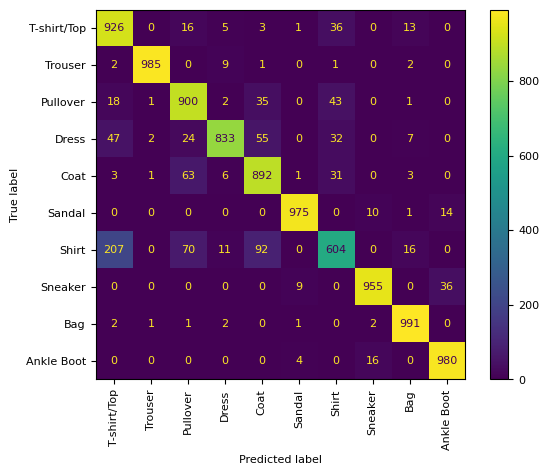

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = F_MNIST_test.targets.to('cpu').numpy()
y_pred = CNN_predicted_labels
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Class_names)
disp.plot()
plt.xticks(rotation=90)
plt.show()

Our CNN model also shows some difficulty in correctly classifying the 'Shirt' class, often mislabeling it as 'T-shirt/Top'. However, it is notable that the CNN's performance in distinguishing between these two classes is superior to that of the Deep Belief Network (DBN).

In terms of overall accuracy, the CNN outperforms the DBN. Despite some misclassifications, the CNN shows stronger predictive capabilities, making it the preferred model based on our current evaluation metrics.

# Robustness to Noise

Next, we will introduce noise into the input images to examine the robustness of both the Deep Belief Network (DBN) and the Convolutional Neural Network (CNN) against sensory signal perturbations.

By doing so, akin to procedures in psychophysical experiments, we can generate a psychometric curve. This curve will provide a visual representation of the classification accuracy's decline as a function of the increasing noise level. This exercise aids in understanding the durability of the learned representations when faced with less-than-ideal inputs.


## Gaussian Noise

Guassion noise adds noise following a Gaussian (normal) distribution to the image. Each pixel in the image is altered according to a Gaussian distribution. The intensity of the noise can be controlled by the standard deviation of the Gaussian distribution.



In [ ]:
import copy

def copy_dataset(original_dataset):
    copied_dataset = copy.deepcopy(original_dataset)
    return copied_dataset

In [ ]:
def inject_gaussian_noise(dataset, noise_level):

  noisy_dataset = copy_dataset(dataset)
  noisy_dataset.data = noisy_dataset.data.float()
  random_gaussian_tensor = torch.randn(dataset.data.shape, device = device)*noise_level
  noisy_dataset.data = noisy_dataset.data.to(device)  + random_gaussian_tensor
  # Ensure the values are in the range [0, 1]
  noisy_dataset.data = torch.clamp(noisy_dataset.data, 0.0, 1.0)

  return noisy_dataset

Now let look what our train data looks like with guassion noise.

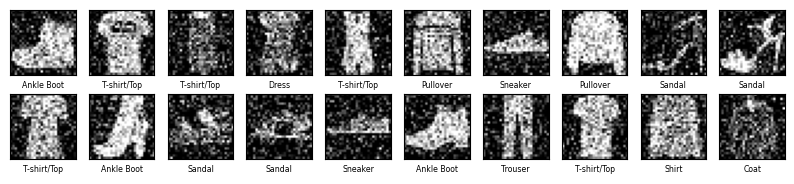

In [ ]:
noise_level = 0.3
Fmnist_train_with_noise = inject_gaussian_noise(Fashion_MNIST_train, noise_level)

plot_first_20(Fmnist_train_with_noise.data, Fashion_MNIST_train.targets)

We are now introducing noise into the test data, which will enable us to compare the performance variations between the CNN and the different hidden layer readouts of the DBN under these perturbed conditions. The comparative analysis will focus on the accuracy metric across both models.

In [ ]:
class DBNWithReadOut(torch.nn.Module):
    def __init__(self, dbn_mnist, readouts, readout_level=0):
        super().__init__()
        self.readouts = readouts
        self.dbn_mnist = dbn_mnist
        self._require_grad()
        self.readout_level = readout_level

    def _require_grad(self):
      for rbm in self.dbn_mnist.rbm_layers:
        rbm.W.requires_grad_()
        rbm.h_bias.requires_grad_()

    def forward(self, image):
      """This forward pass uses probabilities instead of samples as RBM outputs
       to backpropagate the gradient"""
      p_v = image
      hidden_states = []
      for rbm in self.dbn_mnist.rbm_layers:
        p_v = p_v.view((p_v.shape[0], -1))  # flatten
        p_v, v = rbm(p_v)
        hidden_states.append(p_v)
      return self.readouts[self.readout_level].forward(hidden_states[self.readout_level])

In [ ]:
Fashion_test_loader = torch.utils.data.DataLoader(
    tv.datasets.FashionMNIST('data/', train=False, download=False, transform=tv.transforms.Compose([tv.transforms.ToTensor()])),
    batch_size=batch_size, shuffle=True)

In [ ]:
dbn_with_1_readout = DBNWithReadOut(dbn_Fmnist, [linear1], readout_level=0)
dbn_with_2_readout = DBNWithReadOut(dbn_Fmnist, [linear1, linear2], readout_level=1)
dbn_with_3_readout = DBNWithReadOut(dbn_Fmnist, [linear1, linear2, linear3], readout_level=2)

In [ ]:
def get_accuracy_values_at_noise_level(model, device, test_loader, noise_level):
    correct = 0

    for data, target in test_loader:
        # Move data to the same device as the model
        data = data.to(device).requires_grad_()
        target = target.to(device)

        # Compute the model output
        output = model(data.view(batch_size, 1, 28, 28))

        # Generate perturbed data
        perturbed_data = inject_gaussian_noise(data, noise_level)

        # Classify the perturbed data
        output = model(perturbed_data)

        # Calculate accuracy
        final_pred = output.argmax(dim=1, keepdim=True)
        correct += final_pred.eq(target.view_as(final_pred)).sum().item()

    # Compute the final accuracy for the model
    final_acc = correct / float(len(test_loader.sampler))

    return final_acc

In [ ]:
from tabulate import tabulate

model_dict = {
    "First hidden layer DBN": dbn_with_1_readout,
    "Second hidden layer DBN": dbn_with_2_readout,
    "Third hidden layer DBN": dbn_with_3_readout,
    "CNN model": fashion_cnn
}

noise_intensity = 0.3
models = {}

for model_label, model_instance in model_dict.items():
    accuracy = get_accuracy_values_at_noise_level(model_instance, device, Fashion_test_loader, noise_intensity)
    #print(f"The {model_label}'s accuracy is {accuracy * 100:.2f}% with a noise level of {noise_intensity}.")
    models[model_label] = accuracy * 100

table = [["Model Name", "Accuracy (%)", "Noise Level"]]

for model_name, accuracy in models.items():
    table.append([model_name, accuracy, noise_intensity])

print(tabulate(table, headers="firstrow"))


Model Name                 Accuracy (%)    Noise Level
-----------------------  --------------  -------------
First hidden layer DBN            53.72            0.3
Second hidden layer DBN           60.49            0.3
Third hidden layer DBN            34.34            0.3
CNN model                         33.48            0.3


From the accuracy metrics above, it's apparent that DBN models exhibit superior robustness to noise compared to the CNN model. While the accuracy of CNN significantly declines in the presence of noise, DBNs maintain relatively stable performance. Next, we'll graphically represent these differences by plotting the performance of DBNs and the CNN at various noise intensities, facilitating a more comprehensive comparison.

In [ ]:
def plot_noise_robustness_curves(models, device, test_loader, noise_levels):
    accuracy_values = {model_name: [] for model_name in models}

    for noise_level in noise_levels:
        for model_name, model in models.items():
            acc = get_accuracy_values_at_noise_level(model, device, test_loader, noise_level)
            accuracy_values[model_name].append(acc)

    fig, ax = plt.subplots(figsize= (7, 5))
    for model_name, acc_values in accuracy_values.items():
        ax.plot(range(len(noise_levels)), acc_values)

    ax.set_title("Robustness to noise")
    ax.set_xlabel("Noise level (%)")
    ax.set_ylabel("Accuracy")
    plt.xticks(range(len(noise_levels)), [int(l*100) for l in noise_levels])
    plt.legend(models.keys())

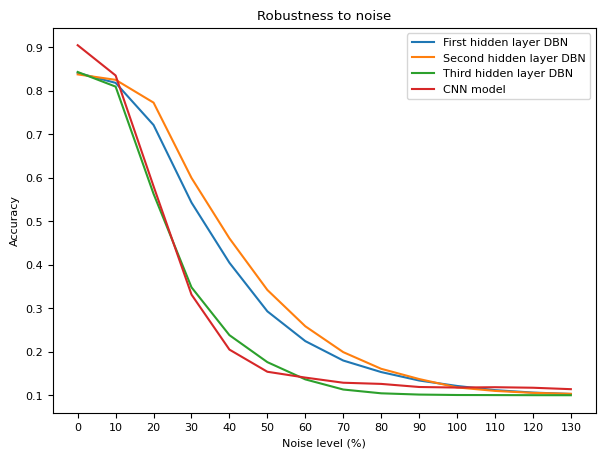

In [ ]:
model_dict = {
    "First hidden layer DBN": dbn_with_1_readout,
    "Second hidden layer DBN": dbn_with_2_readout,
    "Third hidden layer DBN": dbn_with_3_readout,
    "CNN model": fashion_cnn
}

noise_levels = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3]

plot_noise_robustness_curves(model_dict, device, Fashion_test_loader, noise_levels)

The above plot clearly demonstrates that our DBN models exhibit superior robustness against noise compared to the CNN model.This superior performance is observed even under high noise levels, where DBN continues to classify the dataset effectively while the CNN's performance approximates random classification! Furthermore, the second layer DBN surpasses both the first and third layers in performance, suggesting that the inclusion of a third layer may not have been necessary in our case.

#Adversarial Attacks


Adversarial attacks alter inputs, tricking models into misclassifications by maximizing the loss. Normally, in training, we adjust model weights based on the loss function's gradient to minimize loss. However, to craft adversarial samples:

* We modify the input instead of the weights.
*We follow the gradient's direction to maximize the loss.
Hence, an adversarial sample is generated as follows:   𝑥̃ =𝑥+𝜖⋅sign(∇𝑥𝐽(𝑤,𝑥,𝑦))

This method is termed 'Fast Gradient Sign'.

In [ ]:
def fgsm_attack(image, epsilon, data_grad):
    # Collect the element-wise sign of the data gradient
    sign_data_grad = data_grad.sign()

    # Create the perturbed image by adjusting each pixel of the input image
    perturbed_image = image + epsilon*sign_data_grad

    # Adding clipping to maintain [0,1] range
    perturbed_image = torch.clamp(perturbed_image, 0, 1)

    # Return the perturbed image
    return perturbed_image

Let's see what an adversiarial sample looks like.

In [ ]:
def plot_perturbed_images(test_data, model, epsilon):

    n_images=20
    plt.figure(figsize=(10,2))
    #plt.figure(dpi=100)

    for i in range(n_images):
        test_image = test_data.data[i].unsqueeze(0).float().to(device)
        test_image.requires_grad = True

        model_outputs = model(test_image)

        test_image_label = test_data.targets[i].unsqueeze(0)  # get ground truth label for that image
        loss_value = torch.nn.functional.cross_entropy(model_outputs.to(device), test_image_label.to(device))  # get loss value
        model.zero_grad()
        loss_value.backward()
        image_grad = test_image.grad.data  # get the gradient of the pixels w.r.t. the loss
        perturbed_image = fgsm_attack(test_image, epsilon, image_grad)

        perturbed_image_np = perturbed_image.detach().to('cpu').numpy()

        # Get the model's prediction under attack
        perturbed_output = model(perturbed_image)
        _, perturbed_pred = torch.max(perturbed_output.data, 1)

        plt.subplot(2,10, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(perturbed_image_np.reshape(28,28), cmap='gray')
        #plt.title("Pred: {}".format(Class_names[])) # adding the predicted label as title
        plt.xlabel(Class_names[perturbed_pred.item()], fontsize='x-small')
        #plt.axis('off')

    plt.tight_layout()  # Adjusts subplot params so that subplots fit into the figure area
    plt.show()

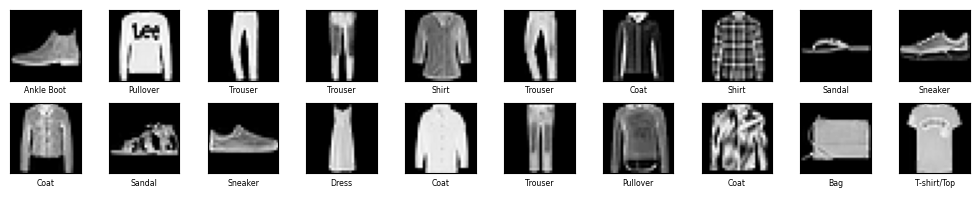

In [ ]:
plot_first_20(F_MNIST_test.data, F_MNIST_test.targets)

These are the first 20 picturs and their lables in the test dataset.



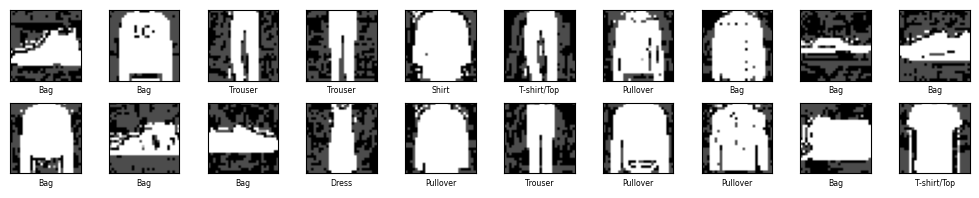

In [ ]:
plot_perturbed_images(F_MNIST_test, dbn_with_3_readout, 0.3)

The following images represent the same set of 20 samples subjected to adversarial attacks within the DBN model that reads out at the third layer. Evidently, the model encounters difficulty classifying several of these perturbed images

## Resisting to Adversarial Attacks

We will now evaluate the resilience of our two models - the CNN and the DBN - against adversarial attacks.

In addition to the standard defenses, the DBN will undergo an extra 'top-down' reconstruction step. This process, which involves going from the final layer's hidden representation to visible units and back, aims to mitigate the effects of the attack.

We will visualize the performance of these models under various attack intensities, by plotting their accuracies.

In [ ]:
def show_image(image):
    plt.imshow(image.detach().to('cpu').numpy().reshape(28,28))
    plt.show()

In [ ]:
def test_robustness_to_attack(model, device, test_loader, epsilon, num_steps=0, verbose=True):
    correct = 0
    print_reconstruction = num_steps > 0
    for data, target in tqdm(test_loader):
        data, target = data.to(device), target.to(device)
        data.requires_grad = True

        output = model.forward(data.view(batch_size, 1, 28, 28))

        # Display original sample
        if (print_reconstruction and verbose):
            print("\nHere's the original sample:\n")
            show_image(data[0])

        # Generate perturbed data
        loss = functional.nll_loss(output, target)
        model.zero_grad()
        loss.backward()
        data_grad = data.grad.data
        perturbed_data = fgsm_attack(data, epsilon, data_grad)

        # Display perturbed sample
        if (print_reconstruction and verbose):
            print("\nHere's a perturbed sample:\n")
            show_image(perturbed_data[0])

        # Reconstruct the input if requested
        if num_steps > 0:
            for __ in range(0, num_steps):
                perturbed_data, __ = model.dbn_mnist.reconstruct(perturbed_data)
            if (print_reconstruction and verbose):
                print(f"\nHere's what a {num_steps}-steps reconstructed sample looks like:\n")
                show_image(perturbed_data[0])
                print_reconstruction = False

        # Classify the perturbed (and possibly reconstructed) image
        output = model(perturbed_data)
        final_pred = output.argmax(-1)
        correct += (final_pred == target).sum()

    # Display final accuracy
    final_acc = correct/float(len(test_loader.sampler))
    print("\nEpsilon: {}\nTest Accuracy: {:.2f}%\n".format(epsilon, final_acc*100))

    return final_acc.item()


In [ ]:
test_robustness_to_attack(dbn_with_3_readout, device, Fashion_test_loader, epsilon=0.05, num_steps=0)

  0%|          | 0/80 [00:00<?, ?it/s]


Epsilon: 0.05
Test Accuracy: 67.73%



0.677299976348877

In [ ]:
test_robustness_to_attack(fashion_cnn, device, Fashion_test_loader, epsilon=0.05, num_steps=0)

  0%|          | 0/80 [00:00<?, ?it/s]


Epsilon: 0.05
Test Accuracy: 55.14%



0.5514000058174133

These accuracies suggests that DBN is superior to CNN also in advarsarial attaks.

In [ ]:
epsilon_values = [0, 0.05, 0.10, 0.15, 0.20, 0.25]

def test_epsilon_values_effect(model, n_steps):
  accuracies = list()

  for eps in epsilon_values:
      acc = test_robustness_to_attack(model, device, test_loader, eps, num_steps=n_steps, verbose=False)
      accuracies.append(acc)

  return accuracies

In [ ]:
%%capture

models_n_steps = {
    "CNN": (fashion_cnn, 0),
    "DBN_three_layer": (dbn_with_3_readout, 0),
    "DBN_three_layer_top-down": (dbn_with_3_readout, 1),
    "DBN_two_layer": (dbn_with_2_readout, 0),
    "DBN_two_layer_top-down": (dbn_with_2_readout, 1)}

accuracies = {model_name: test_epsilon_values_effect(model, n_steps) for model_name, (model, n_steps) in models_n_steps.items()}

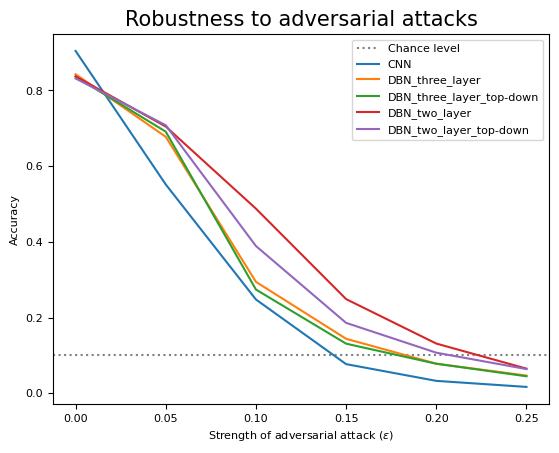

In [ ]:
# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Plot chance level
ax.axhline(0.1, color='gray', linestyle=':')

# Plot accuracies for each model
for model_name, model_accuracies in accuracies.items():
    #print(model_name)
    ax.plot(epsilon_values, model_accuracies)

# Set labels, title and legend
ax.set_xlabel("Strength of adversarial attack ($\epsilon$)")
ax.set_ylabel("Accuracy")
ax.set_title("Robustness to adversarial attacks", {'fontsize': 15})
ax.legend(["Chance level"] + list(accuracies.keys()))


In the face of adversarial attacks, much like in situations with Gaussian noise, the two-layer Deep Belief Network (DBN) consistently outperforms the other models. This superiority of DBNs over Convolutional Neural Networks (CNNs) can be attributed to the probabilistic nature and layered architecture of DBNs, which seem to provide a more robust defense mechanism against adversarial attacks.

In essence, DBNs can learn complex data distributions due to their layered structure, making them more resilient to adversarial attacks that aim to exploit these characteristics. Meanwhile, despite their strong performance in image recognition tasks, CNNs appear to be more vulnerable to these attacks, likely due to their deterministic activations and lack of depth in probabilistic modeling.

In summary, these results highlight the robustness of DBNs in both classification tasks under noisy conditions and their resistance to adversarial attacks, making them a compelling choice for real-world applications.

#Conclusion

In our exploration of model performance on the Fashion MNIST dataset, we have found that while Convolutional Neural Networks (CNNs) present certain advantages such as faster training times and higher accuracy under ideal conditions, their resilience in the face of more challenging scenarios, such as when handling noisy data or defending against adversarial attacks, is somewhat lacking.

The Deep Belief Networks (DBNs), despite longer training times, demonstrate superior robustness in these non-ideal conditions. The ability of DBNs to effectively classify even in the presence of noise or under adversarial attacks can be attributed to their unique architecture and their intrinsic ability to learn and capture complex data distributions, which enhances their resilience to such perturbations.

Adversarial attacks and noisy environments are prevalent in real-world applications. While accuracy is an important metric, the robustness of a model in handling these challenging scenarios is a crucial aspect to consider. In scenarios such as these, DBNs have emerged as a more reliable choice in our study.

Our analysis also suggested an optimal layer configuration for DBNs. The two-layered DBN consistently outperformed the models with one or three layers, under both noisy and adversarial conditions. This observation hints towards the importance of appropriate model complexity: while additional layers can improve the model's capacity to learn, it doesn't necessarily translate into better performance, and can even degrade the model's robustness.

Overall, our findings emphasize the importance of considering factors beyond just accuracy and speed when selecting a model for specific tasks, especially those exposed to real-world conditions. The resilience of a model against adversarial attacks and noisy data, as demonstrated by DBNs in our analysis, can often be of more significant consequence, ensuring reliable and stable performance in diverse operational environments.